In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 712M/715M [00:05<00:00, 114MB/s]
100% 715M/715M [00:05<00:00, 134MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
data="/content/cifar-10.zip"
with ZipFile(data,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")


The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 33.4 MB/s eta 0:00:00


In [8]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames=os.listdir('/content/train')
print(type(filenames))

<class 'list'>


In [12]:
print(len(filenames))

50000


In [13]:
print(filenames[0:5])

['13966.png', '30598.png', '5655.png', '8965.png', '42670.png']


In [14]:
print(filenames[-5:])

['9122.png', '44669.png', '6553.png', '322.png', '44430.png']


*** Labels Processing***

In [15]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id']==35799]

,id,label
35798,35799,airplane


In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [22]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,
                   'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [23]:
labels=[labels_dictionary[i] for i in labels_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


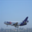

In [25]:
# displaying sample image

import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/35799.png')
cv2_imshow(img)



In [26]:
id_list=list(labels_df['id'])

In [27]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [28]:
# convert images to numpy array
train_data_folder='/content/train/'

data=[]

for id in id_list:
  image=Image.open(train_data_folder+ str(id) +'.png')
  image=np.array(image)
  data.append(image)


In [29]:
type(data)

list

In [30]:
len(data)

50000

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
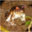

In [33]:
data[0]

In [34]:
# convert image list and label list to numpy array
x=np.array(data)
y=np.array(labels)

In [35]:
type(x)

numpy.ndarray

In [36]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [39]:
# scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [40]:
print(x_train_scaled)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

Building the Neural Network

In [41]:
import tensorflow as tf
from tensorflow import keras


In [42]:
no_of_classes=10

# setting up the layers of Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(no_of_classes,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [44]:
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.1837 - loss: 2.1849 - val_acc: 0.2473 - val_loss: 2.0048
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2425 - loss: 2.0093 - val_acc: 0.2465 - val_loss: 1.9534
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2462 - loss: 1.9651 - val_acc: 0.2470 - val_loss: 1.9362
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.2424 - loss: 1.9489 - val_acc: 0.2450 - val_loss: 1.9298
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2519 - loss: 1.9395 - val_acc: 0.2418 - val_loss: 1.9175
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.2487 - loss: 1.9445 - val_acc: 0.2467 - val_loss: 1.9132
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2529 - loss: 1.9285 - val_acc: 0.2495 - val_loss: 1.9160
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.2521 - loss: 1.9305 - val_acc: 0.2455 - val_loss: 1.9250
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

ResNet50

In [45]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [46]:
convolutional_base=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [47]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(no_of_classes,activation='softmax'))


In [48]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [49]:
history=model.fit(x_train_scaled,y_train,validation_split=0.10,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 454s 355ms/step - acc: 0.3130 - loss: 2.0893 - val_acc: 0.7343 - val_loss: 0.9220
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 417s 362ms/step - acc: 0.6592 - loss: 1.0983 - val_acc: 0.8917 - val_loss: 0.4695
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 363ms/step - acc: 0.7847 - loss: 0.7845 - val_acc: 0.9135 - val_loss: 0.3605
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 362ms/step - acc: 0.8576 - loss: 0.5903 - val_acc: 0.9260 - val_loss: 0.2760
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 399s 354ms/step - acc: 0.9005 - loss: 0.4611 - val_acc: 0.9365 - val_loss: 0.2437
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 355ms/step - acc: 0.9330 - loss: 0.3603 - val_acc: 0.9335 - val_loss: 0.2406
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 354ms/step - acc: 0.9477 - loss: 0.2936 - val_acc: 0.9398 - val_loss: 0.2267
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 355ms/step - acc: 0.9594 - loss: 0.2448 - val_acc: 0.9367 - val_loss: 0.2300
Epoch 9/

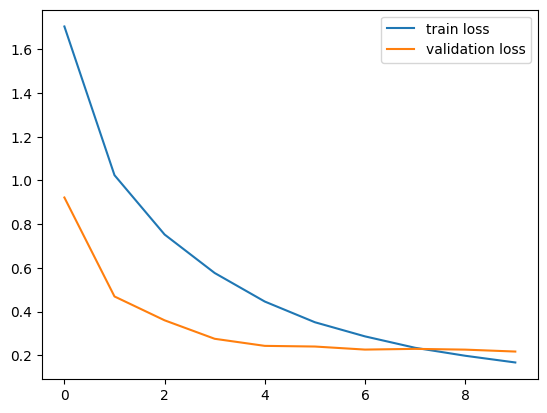

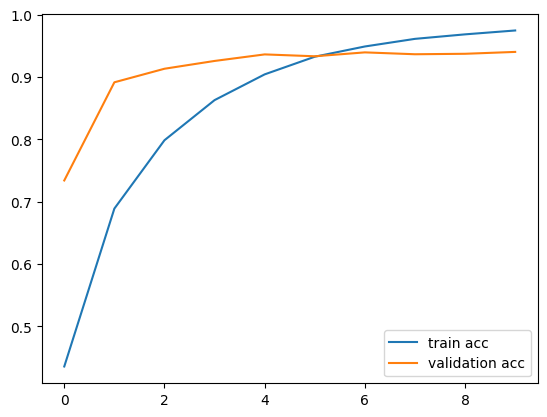

In [50]:
h=history
#plot the loss value

plt.plot(h.history['loss'],label='train loss')

plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'],label='train acc')

plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()